In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
from datetime import datetime
from math import ceil
from math import floor
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pickle
import csv

Using TensorFlow backend.


In [2]:
def OrganizarDados(dataSet):
    #Transformando data em variável do tipo datetime
    dataSet["Data"] = pd.to_datetime(dataSet["Data"], format = "%d/%m/%Y")
    #Atribuindo "Data" como índice para a base de dados
    dataSet = dataSet.set_index("Data")
    #Separando os dados em dois dataframes, um para as 00:00 h e outro para as 12:00 h
    dataSet00, dataSet12 = dataSet[dataSet["Hora"] == 0], dataSet[dataSet["Hora"] == 1200]
    #Descartando as colunas "Hora", "Estacao" e "Unnamed: 11" 
    dataSet00, dataSet12 = dataSet00.drop(columns = ["Hora", "Estacao", "Unnamed: 11"]), dataSet12.drop(columns = ["Hora", "Estacao", "Unnamed: 11"])
    #Eliminando colunas completas por "NaN" em cada uma das bases de dados
    dataSet00 = dataSet00.drop(columns = ["Precipitacao","TempMinima"])
    dataSet12 = dataSet12.drop(columns = ["TempMaxima","Insolacao","Evaporacao Piche","Temp Comp Media","Umidade Relativa Media","Velocidade do Vento Media"])
    #Criando o intervalo completo de tempo de 01-01-1980 à 31-12-2017
    dataInicial = '1980-01-01'
    dataFinal = '2017-12-31'
    tempo = pd.date_range(dataInicial, dataFinal)
    #Atribuindo este intervalo de tempo à um dataSet provisório
    dataSetProv = pd.DataFrame()
    dataSetProv["Data"] = tempo
    #Atribuindo o índice para o dataSet provisório como sendo a coluna de datas
    dataSetProv = dataSetProv.set_index("Data")
    #Mesclando o dataSet provisório como sendo o resultado da junção dos dataSet00 e dataSet12
    dataSetProv = dataSetProv.join(dataSet00).join(dataSet12)
    #Tornando o dataSet como sendo o dataSet provisório
    dataSet = dataSetProv  
    return dataSet

In [3]:
#Leitura de dados
dataSetAracaju = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/aracajudiario.csv",
                      sep=';',skiprows=16))
dataSetBelem = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/belemdiario.csv",
                      sep=';',skiprows=16))
dataSetBeloHorizonte = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/bhdiario.csv",
                      sep=';',skiprows=16))
dataSetBoaVista = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/boavistdiario.csv",
                      sep=';',skiprows=16))
dataSetCuiaba = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/cuiabadiario.csv",
                      sep=';',skiprows=16))
dataSetCuritiba = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/curitibadiario.csv",
                      sep=';',skiprows=16))
dataSetFlorianopolis = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/florianopolisdiario.csv",
                      sep=';',skiprows=16))
dataSetFortaleza = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/fortalezadiario.csv",
                      sep=';',skiprows=16))
dataSetGoiania = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/goianiadiario.csv",
                      sep=';',skiprows=16))
dataSetJoaoPessoa = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/joaopessoadiario.csv",
                      sep=';',skiprows=16))
dataSetMacapa = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/macapadiario.csv",
                      sep=';',skiprows=16))
dataSetMaceio = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/maceiodiario.csv",
                      sep=';',skiprows=16))
dataSetManaus = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/manausdiario.csv",
                      sep=';',skiprows=16))
dataSetNatal = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/nataldiario.csv",
                      sep=';',skiprows=16))
dataSetPalmas = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/palmasdiario.csv",
                      sep=';',skiprows=16))
dataSetPortoAlegre = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/portoalegrediario.csv",
                      sep=';',skiprows=16))
dataSetRecife= OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/recifediario.csv",
                      sep=';',skiprows=16))
dataSetRioBranco = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/riobrancodiario.csv",
                      sep=';',skiprows=16))
dataSetRioDeJaneiro = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/rjdiario.csv",
                      sep=';',skiprows=16))
dataSetSalvador = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/salvadordiario.csv",
                      sep=';',skiprows=16))
dataSetSaoLuis = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/saoluisdiario.csv",
                      sep=';',skiprows=16))
dataSetSaoPaulo = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/spdiario.csv",
                      sep=';',skiprows=16))
dataSetTeresina = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/teresinadiario.csv",
                      sep=';',skiprows=16))
dataSetVitoria = OrganizarDados(pd.read_csv("https://raw.githubusercontent.com/gilvandrocesardemedeiros/Meteorology_replace-missing-values/master/DadosDiarios/vitoriadiario.csv",
                      sep=';',skiprows=16))

In [4]:
#Definindo uma função para criar a MLP
def trainMLP(optimizer='adam', init='random_uniform', units = 7, camadas = 2):    
  #Criando o modelo
  mlp = Sequential()
  #Adicionando a camada de entrada
  mlp.add(Dense(activation = 'tanh', input_dim = units, units = units, kernel_initializer = init, bias_initializer='zeros'))
  #Adicionando as camadas escondidas
  for i in range(camadas):
    mlp.add(Dense(activation = 'tanh', units = units, kernel_initializer = init, bias_initializer='zeros'))
  #Adicionando a camada de saída
  mlp.add(Dense(units = 1, kernel_initializer = init, bias_initializer='zeros'))    
  # Compilando o modelo
  mlp.compile(loss='mean_squared_error', optimizer = optimizer, metrics= ['mae'])
  return mlp

# Previsão de Temperatura Máxima

In [5]:
#Lendo os modelos de redes neurais para temperatura máxima salvos com pickle
ModeloTempMax_Aracaju = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaAracaju.sav", 'rb'))
ModeloTempMax_Belem = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaBelem.sav", 'rb'))
ModeloTempMax_BeloHorizonte = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaBeloHorizonte.sav", 'rb'))
ModeloTempMax_BoaVista = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaBoaVista.sav", 'rb'))
ModeloTempMax_Cuiaba = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaCuiaba.sav", 'rb'))
ModeloTempMax_Curitiba = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaCuritiba.sav", 'rb'))
ModeloTempMax_Florianopolis = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaFlorianopolis.sav", 'rb'))
ModeloTempMax_Fortaleza = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaFortaleza.sav", 'rb'))
ModeloTempMax_Goiania = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaGoiania.sav", 'rb'))
ModeloTempMax_JoaoPessoa = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaJoaoPessoa.sav", 'rb'))
ModeloTempMax_Macapa = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaMacapa.sav", 'rb'))
ModeloTempMax_Maceio = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaMaceio.sav", 'rb'))
ModeloTempMax_Manaus = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaManaus.sav", 'rb'))
ModeloTempMax_Natal = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaNatal.sav", 'rb'))
ModeloTempMax_Palmas = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaPalmas.sav", 'rb'))
ModeloTempMax_PortoAlegre = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaPortoAlegre.sav", 'rb'))
ModeloTempMax_Recife = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaRecife.sav", 'rb'))
ModeloTempMax_RioBranco = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaRioBranco.sav", 'rb'))
ModeloTempMax_RioDeJaneiro = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaRioDeJaneiro.sav", 'rb'))
ModeloTempMax_Salvador = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaSalvador.sav", 'rb'))
ModeloTempMax_SaoLuis = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaSaoLuis.sav", 'rb'))
ModeloTempMax_SaoPaulo = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaSaoPaulo.sav", 'rb'))
ModeloTempMax_Teresina = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaTeresina.sav", 'rb'))
ModeloTempMax_Vitoria = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMaximaVitoria.sav", 'rb'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/home/gilvandro/anaconda3/lib/python3.6/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.21.2 when using version 0.21.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [6]:
def DadosTempMax(dataSet):
    #Separando base de dados para treino de rede neural para previsão de temperatura máxima
    dataTempMax = dataSet.dropna(subset = ["TempMaxima"])
    #Separando a variável que será prevista, TempMaxima, da base de dados
    tempMax = dataTempMax["TempMaxima"]
    dataTempMax = dataTempMax.drop(columns = "TempMaxima")
    #Efetuando uma transformação que lineariza todas as informações para cada coluna entre -1 e 1
    mms = MinMaxScaler(feature_range=(-1, 1))
    dataTempMax = mms.fit_transform(dataTempMax)
    #Trocando dados faltantes por 0 
    dataTempMax = np.nan_to_num(dataTempMax, copy = False)
    return dataTempMax, tempMax

In [7]:
#Tratamento de dados para previsão de temperatura máxima
dataTempMaxAracaju, tempMaxAracaju = DadosTempMax(dataSetAracaju)
dataTempMaxBelem, tempMaxBelem = DadosTempMax(dataSetBelem)
dataTempMaxBeloHorizonte, tempMaxBeloHorizonte = DadosTempMax(dataSetBeloHorizonte)
dataTempMaxBoaVista, tempMaxBoaVista = DadosTempMax(dataSetBoaVista)
dataTempMaxCuiaba, tempMaxCuiaba = DadosTempMax(dataSetCuiaba)
dataTempMaxCuritiba, tempMaxCuritiba = DadosTempMax(dataSetCuritiba)
dataTempMaxFlorianopolis, tempMaxFlorianopolis = DadosTempMax(dataSetFlorianopolis)
dataTempMaxFortaleza, tempMaxFortaleza = DadosTempMax(dataSetFortaleza)
dataTempMaxGoiania, tempMaxGoiania = DadosTempMax(dataSetGoiania)
dataTempMaxJoaoPessoa, tempMaxJoaoPessoa = DadosTempMax(dataSetJoaoPessoa)
dataTempMaxMacapa, tempMaxMacapa = DadosTempMax(dataSetMacapa)
dataTempMaxMaceio, tempMaxMaceio = DadosTempMax(dataSetMaceio)
dataTempMaxManaus, tempMaxManaus = DadosTempMax(dataSetManaus)
dataTempMaxNatal, tempMaxNatal = DadosTempMax(dataSetNatal)
dataTempMaxPalmas, tempMaxPalmas = DadosTempMax(dataSetPalmas)
dataTempMaxPortoAlegre, tempMaxPortoAlegre = DadosTempMax(dataSetPortoAlegre)
dataTempMaxRecife, tempMaxRecife = DadosTempMax(dataSetRecife)
dataTempMaxRioBranco, tempMaxRioBranco = DadosTempMax(dataSetRioBranco)
dataTempMaxRioDeJaneiro, tempMaxRioDeJaneiro = DadosTempMax(dataSetRioDeJaneiro)
dataTempMaxSalvador, tempMaxSalvador = DadosTempMax(dataSetSalvador)
dataTempMaxSaoLuis, tempMaxSaoLuis = DadosTempMax(dataSetSaoLuis)
dataTempMaxSaoPaulo, tempMaxSaoPaulo = DadosTempMax(dataSetSaoPaulo)
dataTempMaxTeresina, tempMaxTeresina = DadosTempMax(dataSetTeresina)
dataTempMaxVitoria, tempMaxVitoria = DadosTempMax(dataSetVitoria)

<h3> Resultados:

In [8]:
#Criando arquivo para exportar dados de análise para as cidades
csvDataColumns = ['Cidade', 'Variável', 'Coef_Corr_Pearson', 'MAE', 'MSE']
with open('ErrorData.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(csvDataColumns)
csvFile.close()

In [9]:
def PlotarGrafico(ModeloTempMax, dataTempMax, tempMax, cidade):
    tempMaxPrevista = ModeloTempMax.predict(dataTempMax)
    maiorValor = ceil(max((max(tempMaxPrevista)),(max(tempMax))))
    menorValor = floor(min((min(tempMaxPrevista)),(min(tempMax))))
    plt.scatter(tempMaxPrevista, tempMax)
    plt.title("Temperatura máxima estimada para a cidade de " + cidade)
    plt.xlabel("Temperatura estimada por ANN")
    plt.ylabel("Temperatura na base INMET")
    plt.xlim([menorValor,maiorValor])
    plt.ylim([menorValor,maiorValor])
    plt.show()
    coefCorr = str(np.corrcoef(tempMaxPrevista, tempMax)[0,1])
    MAE = str(mean_absolute_error(tempMaxPrevista, tempMax))
    MSE = str(mean_squared_error(tempMaxPrevista, tempMax))
    #Matriz de correlação
    print("Coef. Corr. Pearson: " + coefCorr)
    #Erro médio absoluto
    print("MAE: " + MAE)
    #Erro quadrático médio entre a temperatura máxima prevista e a real
    print("MSE: " + MSE)
    exportCSV(tempMax, tempMaxPrevista, cidade, "TempMax")
    row = [cidade, 'tempMax', coefCorr, MAE, MSE]
    with open('ErrorData.csv', 'a') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerow(row)
    csvFile.close()

In [10]:
def exportCSV(temp, tempPrevista, cidade, variavel):
    prov = pd.DataFrame()
    prov[variavel] = temp.values
    prov["Data"] = temp.index
    prov = prov.set_index("Data")
    prov[variavel + "Predicted"] = tempPrevista
    prov.to_csv(path_or_buf = "PredictedData/" + variavel + cidade + ".csv", sep=',')

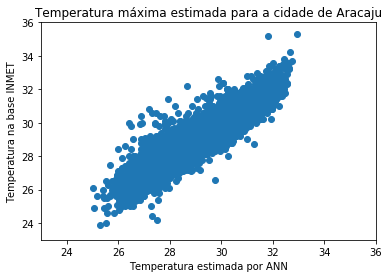

Coef. Corr. Pearson: 0.923683089063281
MAE: 0.4223512577053482
MSE: 0.3010877222451726


In [11]:
#Resultados Aracaju
PlotarGrafico(ModeloTempMax = ModeloTempMax_Aracaju, dataTempMax = dataTempMaxAracaju, 
              tempMax = tempMaxAracaju, cidade = "Aracaju")

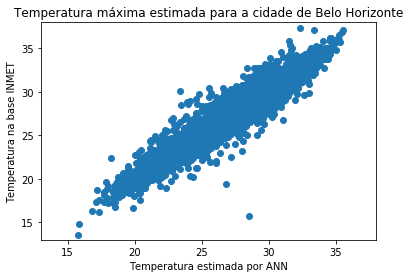

Coef. Corr. Pearson: 0.9582600307235982
MAE: 0.657188913077685
MSE: 0.7693823036827002


In [12]:
#Resultados Belo Horizonte
PlotarGrafico(ModeloTempMax = ModeloTempMax_BeloHorizonte, dataTempMax = dataTempMaxBeloHorizonte, 
              tempMax = tempMaxBeloHorizonte, cidade = "Belo Horizonte")

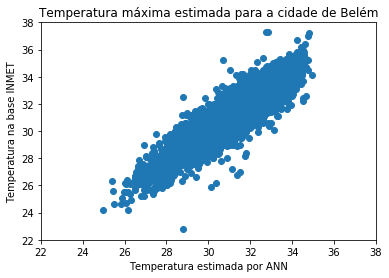

Coef. Corr. Pearson: 0.8830997970169499
MAE: 0.5364436237610618
MSE: 0.47923399674990647


In [13]:
#Resultados Belém
PlotarGrafico(ModeloTempMax = ModeloTempMax_Belem, dataTempMax = dataTempMaxBelem, 
              tempMax = tempMaxBelem, cidade = "Belém")

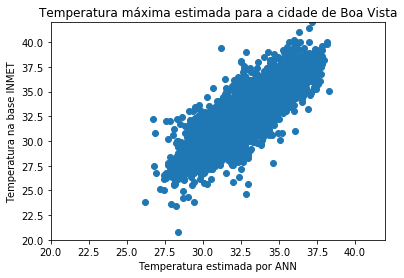

Coef. Corr. Pearson: 0.8711915938939276
MAE: 0.7902476653850006
MSE: 1.1569771687090362


In [14]:
#Resultados Boa Vista
PlotarGrafico(ModeloTempMax = ModeloTempMax_BoaVista, dataTempMax = dataTempMaxBoaVista, 
              tempMax = tempMaxBoaVista, cidade = "Boa Vista")

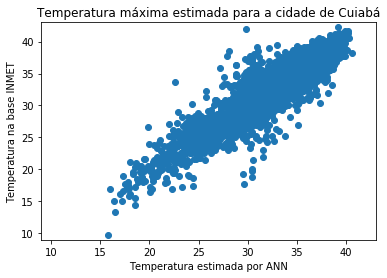

Coef. Corr. Pearson: 0.9091755689030694
MAE: 1.1008548641546139
MSE: 2.233818903467914


In [15]:
#Resultados Cuiabá
PlotarGrafico(ModeloTempMax = ModeloTempMax_Cuiaba, dataTempMax = dataTempMaxCuiaba, 
              tempMax = tempMaxCuiaba, cidade = "Cuiabá")

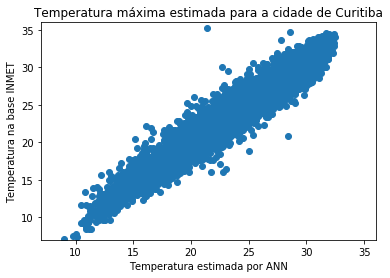

Coef. Corr. Pearson: 0.9698696603940539
MAE: 0.8849141501302279
MSE: 1.3283479683645698


In [16]:
#Resultados Curitiba
PlotarGrafico(ModeloTempMax = ModeloTempMax_Curitiba, dataTempMax = dataTempMaxCuritiba, 
              tempMax = tempMaxCuritiba, cidade = "Curitiba")

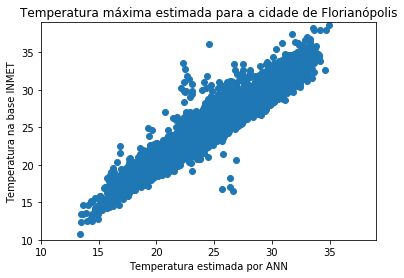

Coef. Corr. Pearson: 0.9623612946860262
MAE: 0.7861885917712312
MSE: 1.2404564175225326


In [17]:
#Resultados Florianópolis
PlotarGrafico(ModeloTempMax = ModeloTempMax_Florianopolis, dataTempMax = dataTempMaxFlorianopolis, 
              tempMax = tempMaxFlorianopolis, cidade = "Florianópolis")

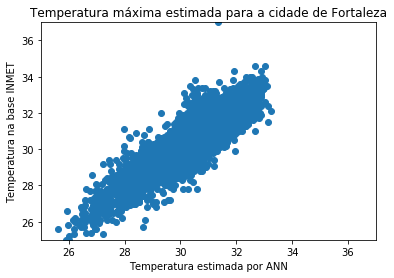

Coef. Corr. Pearson: 0.8771259006002388
MAE: 0.4307374926244259
MSE: 0.32636778281294787


In [18]:
#Resultados Fortaleza
PlotarGrafico(ModeloTempMax = ModeloTempMax_Fortaleza, dataTempMax = dataTempMaxFortaleza, 
              tempMax = tempMaxFortaleza, cidade = "Fortaleza")

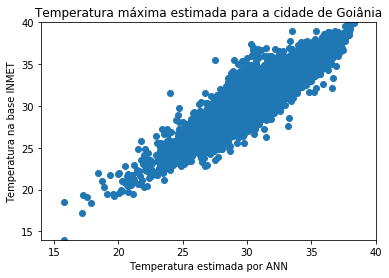

Coef. Corr. Pearson: 0.9107724370566059
MAE: 0.8416731682102835
MSE: 1.2556999713214934


In [19]:
#Resultados Goiânia
PlotarGrafico(ModeloTempMax = ModeloTempMax_Goiania, dataTempMax = dataTempMaxGoiania, 
              tempMax = tempMaxGoiania, cidade = "Goiânia")

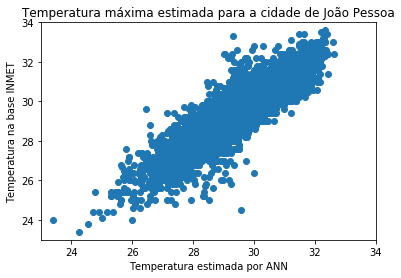

Coef. Corr. Pearson: 0.8921730327836344
MAE: 0.430365915083191
MSE: 0.3290204274315939


In [20]:
#Resultados João Pessoa
PlotarGrafico(ModeloTempMax = ModeloTempMax_JoaoPessoa, dataTempMax = dataTempMaxJoaoPessoa, 
              tempMax = tempMaxJoaoPessoa, cidade = "João Pessoa")

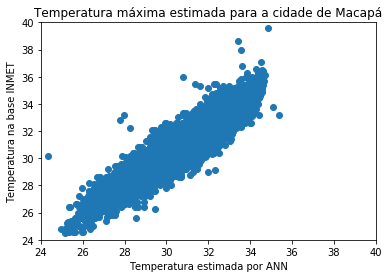

Coef. Corr. Pearson: 0.9299364498061389
MAE: 0.512286808779981
MSE: 0.45962661375368247


In [21]:
#Resultados Macapá
PlotarGrafico(ModeloTempMax = ModeloTempMax_Macapa, dataTempMax = dataTempMaxMacapa, 
              tempMax = tempMaxMacapa, cidade = "Macapá")

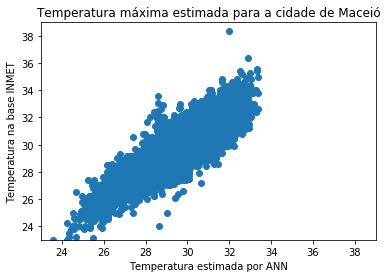

Coef. Corr. Pearson: 0.8931211407640866
MAE: 0.6927306611786189
MSE: 0.7913301445881796


In [22]:
#Resultados Maceió
PlotarGrafico(ModeloTempMax = ModeloTempMax_Maceio, dataTempMax = dataTempMaxMaceio, 
              tempMax = tempMaxMaceio, cidade = "Maceió")

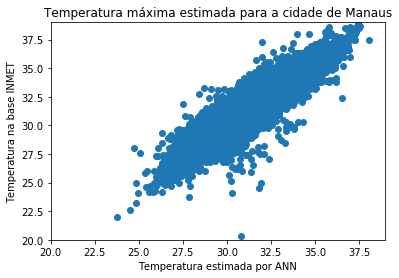

Coef. Corr. Pearson: 0.9091792029972013
MAE: 0.7150855946372352
MSE: 0.8761611778078411


In [23]:
#Resultados Manaus
PlotarGrafico(ModeloTempMax = ModeloTempMax_Manaus, dataTempMax = dataTempMaxManaus, 
              tempMax = tempMaxManaus, cidade = "Manaus")

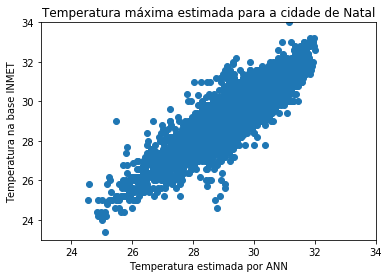

Coef. Corr. Pearson: 0.9040817346044505
MAE: 0.3539517457904392
MSE: 0.24375932632589126


In [24]:
#Resultados Natal
PlotarGrafico(ModeloTempMax = ModeloTempMax_Natal, dataTempMax = dataTempMaxNatal, 
              tempMax = tempMaxNatal, cidade = "Natal")

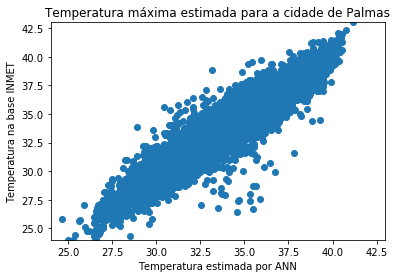

Coef. Corr. Pearson: 0.9313512213392363
MAE: 0.8434851750714168
MSE: 1.2299076977181642


In [25]:
#Resultados Palmas
PlotarGrafico(ModeloTempMax = ModeloTempMax_Palmas, dataTempMax = dataTempMaxPalmas, 
              tempMax = tempMaxPalmas, cidade = "Palmas")

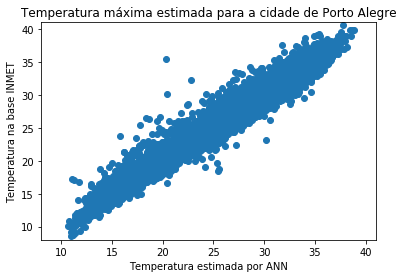

Coef. Corr. Pearson: 0.979455338932414
MAE: 0.843436924863185
MSE: 1.3108239449836272


In [26]:
#Resultados Porto Alegre
PlotarGrafico(ModeloTempMax = ModeloTempMax_PortoAlegre, dataTempMax = dataTempMaxPortoAlegre, 
              tempMax = tempMaxPortoAlegre, cidade = "Porto Alegre")

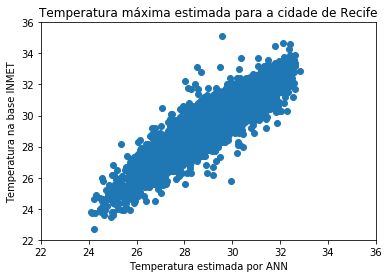

Coef. Corr. Pearson: 0.9241918217078096
MAE: 0.4608056296916366
MSE: 0.3779656365763551


In [27]:
#Resultados Recife
PlotarGrafico(ModeloTempMax = ModeloTempMax_Recife, dataTempMax = dataTempMaxRecife, 
              tempMax = tempMaxRecife, cidade = "Recife")

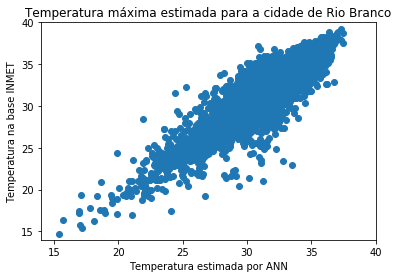

Coef. Corr. Pearson: 0.8915698257509397
MAE: 0.9637970713169903
MSE: 1.6292217056710652


In [28]:
#Resultados Rio Branco
PlotarGrafico(ModeloTempMax = ModeloTempMax_RioBranco, dataTempMax = dataTempMaxRioBranco, 
              tempMax = tempMaxRioBranco, cidade = "Rio Branco")

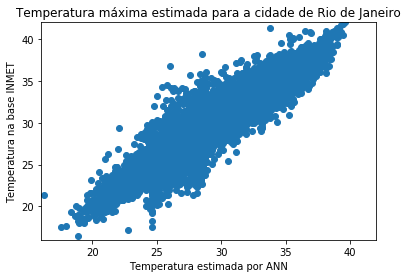

Coef. Corr. Pearson: 0.9264517709783813
MAE: 1.1602421634933577
MSE: 2.613123074402696


In [29]:
#Resultados Rio de Janeiro
PlotarGrafico(ModeloTempMax = ModeloTempMax_RioDeJaneiro, dataTempMax = dataTempMaxRioDeJaneiro, 
              tempMax = tempMaxRioDeJaneiro, cidade = "Rio de Janeiro")

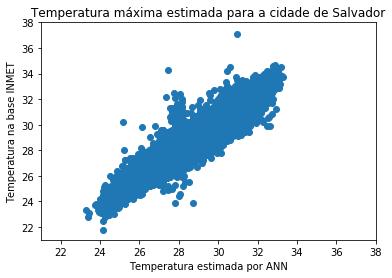

Coef. Corr. Pearson: 0.9437985164269805
MAE: 0.5355173504388056
MSE: 0.49707582398104716


In [30]:
#Resultados Salvador
PlotarGrafico(ModeloTempMax = ModeloTempMax_Salvador, dataTempMax = dataTempMaxSalvador, 
              tempMax = tempMaxSalvador, cidade = "Salvador")

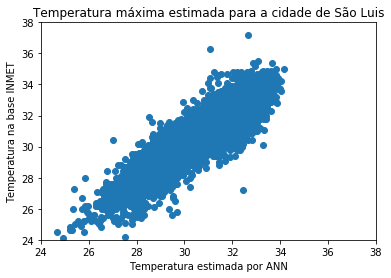

Coef. Corr. Pearson: 0.8845842878637915
MAE: 0.5292568930452546
MSE: 0.47884583596849084


In [31]:
#Resultados São Luis
PlotarGrafico(ModeloTempMax = ModeloTempMax_SaoLuis, dataTempMax = dataTempMaxSaoLuis, 
              tempMax = tempMaxSaoLuis, cidade = "São Luis")

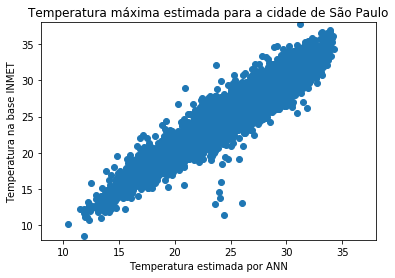

Coef. Corr. Pearson: 0.9611304186484192
MAE: 0.9186816328012333
MSE: 1.4853239850830977


In [32]:
#Resultados São Paulo
PlotarGrafico(ModeloTempMax = ModeloTempMax_SaoPaulo, dataTempMax = dataTempMaxSaoPaulo, 
              tempMax = tempMaxSaoPaulo, cidade = "São Paulo")

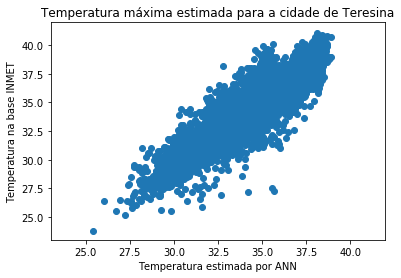

Coef. Corr. Pearson: 0.905158347159883
MAE: 0.8186618334528707
MSE: 1.213792891239477


In [33]:
#Resultados Teresina
PlotarGrafico(ModeloTempMax = ModeloTempMax_Teresina, dataTempMax = dataTempMaxTeresina, 
              tempMax = tempMaxTeresina, cidade = "Teresina")

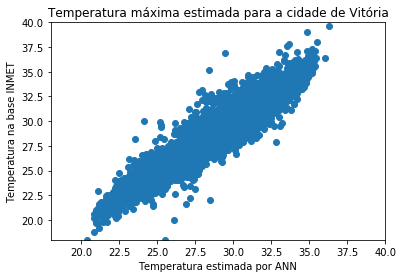

Coef. Corr. Pearson: 0.9570518130530891
MAE: 0.695263256005074
MSE: 0.8538026997679945


In [34]:
#Resultados Vitória
PlotarGrafico(ModeloTempMax = ModeloTempMax_Vitoria, dataTempMax = dataTempMaxVitoria, 
              tempMax = tempMaxVitoria, cidade = "Vitória")

# Previsão de Temperatura Mínima

In [35]:
#Lendo os modelos de redes neurais para temperatura mínima salvos com pickle
ModeloTempMin_Aracaju = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaAracaju.sav", 'rb'))
ModeloTempMin_Belem = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaBelem.sav", 'rb'))
ModeloTempMin_BeloHorizonte = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaBeloHorizonte.sav", 'rb'))
ModeloTempMin_BoaVista = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaBoaVista.sav", 'rb'))
ModeloTempMin_Cuiaba = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaCuiaba.sav", 'rb'))
ModeloTempMin_Curitiba = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaCuritiba.sav", 'rb'))
ModeloTempMin_Florianopolis = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaFlorianopolis.sav", 'rb'))
ModeloTempMin_Fortaleza = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaFortaleza.sav", 'rb'))
ModeloTempMin_Goiania = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaGoiania.sav", 'rb'))
ModeloTempMin_JoaoPessoa = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaJoaoPessoa.sav", 'rb'))
ModeloTempMin_Macapa = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaMacapa.sav", 'rb'))
ModeloTempMin_Maceio = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaMaceio.sav", 'rb'))
ModeloTempMin_Manaus = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaManaus.sav", 'rb'))
ModeloTempMin_Natal = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaNatal.sav", 'rb'))
ModeloTempMin_Palmas = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaPalmas.sav", 'rb'))
ModeloTempMin_PortoAlegre = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaPortoAlegre.sav", 'rb'))
ModeloTempMin_Recife = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaRecife.sav", 'rb'))
ModeloTempMin_RioBranco = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaRioBranco.sav", 'rb'))
ModeloTempMin_RioDeJaneiro = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaRioDeJaneiro.sav", 'rb'))
ModeloTempMin_Salvador = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaSalvador.sav", 'rb'))
ModeloTempMin_SaoLuis = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaSaoLuis.sav", 'rb'))
ModeloTempMin_SaoPaulo = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaSaoPaulo.sav", 'rb'))
ModeloTempMin_Teresina = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaTeresina.sav", 'rb'))
ModeloTempMin_Vitoria = pickle.load(open("SerializedTrainedModels[Pickle]/TemperaturaMinimaVitoria.sav", 'rb'))

/home/gilvandro/anaconda3/lib/python3.6/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.21.2 when using version 0.21.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [36]:
def DadosTempMin(dataSet):
    #Separando dados para treinar rede neural para previsão de temperatura mínima
    dataTempMin = dataSet.dropna(subset = ["TempMinima"])
    #Separando a variável que será prevista, TempMinima, da base de dados
    tempMin = dataTempMin["TempMinima"]
    dataTempMin = dataTempMin.drop(columns = "TempMinima")
    #Efetuando uma transformação que lineariza todas as informações para cada coluna entre -1 e 1
    mms = MinMaxScaler(feature_range=(-1, 1))
    dataTempMin = mms.fit_transform(dataTempMin)
    #Trocando dados faltantes por 0
    dataTempMin = np.nan_to_num(dataTempMin, copy = False)
    return dataTempMin, tempMin

In [37]:
#Tratamento de dados para previsão de temperatura mínima
dataTempMinAracaju, tempMinAracaju = DadosTempMin(dataSetAracaju)
dataTempMinBelem, tempMinBelem = DadosTempMin(dataSetBelem)
dataTempMinBeloHorizonte, tempMinBeloHorizonte = DadosTempMin(dataSetBeloHorizonte)
dataTempMinBoaVista, tempMinBoaVista = DadosTempMin(dataSetBoaVista)
dataTempMinCuiaba, tempMinCuiaba = DadosTempMin(dataSetCuiaba)
dataTempMinCuritiba, tempMinCuritiba = DadosTempMin(dataSetCuritiba)
dataTempMinFlorianopolis, tempMinFlorianopolis = DadosTempMin(dataSetFlorianopolis)
dataTempMinFortaleza, tempMinFortaleza = DadosTempMin(dataSetFortaleza)
dataTempMinGoiania, tempMinGoiania = DadosTempMin(dataSetGoiania)
dataTempMinJoaoPessoa, tempMinJoaoPessoa = DadosTempMin(dataSetJoaoPessoa)
dataTempMinMacapa, tempMinMacapa = DadosTempMin(dataSetMacapa)
dataTempMinMaceio, tempMinMaceio = DadosTempMin(dataSetMaceio)
dataTempMinManaus, tempMinManaus = DadosTempMin(dataSetManaus)
dataTempMinNatal, tempMinNatal = DadosTempMin(dataSetNatal)
dataTempMinPalmas, tempMinPalmas = DadosTempMin(dataSetPalmas)
dataTempMinPortoAlegre, tempMinPortoAlegre = DadosTempMin(dataSetPortoAlegre)
dataTempMinRecife, tempMinRecife = DadosTempMin(dataSetRecife)
dataTempMinRioBranco, tempMinRioBranco = DadosTempMin(dataSetRioBranco)
dataTempMinRioDeJaneiro, tempMinRioDeJaneiro = DadosTempMin(dataSetRioDeJaneiro)
dataTempMinSalvador, tempMinSalvador = DadosTempMin(dataSetSalvador)
dataTempMinSaoLuis, tempMinSaoLuis = DadosTempMin(dataSetSaoLuis)
dataTempMinSaoPaulo, tempMinSaoPaulo = DadosTempMin(dataSetSaoPaulo)
dataTempMinTeresina, tempMinTeresina = DadosTempMin(dataSetTeresina)
dataTempMinVitoria, tempMinVitoria = DadosTempMin(dataSetVitoria)

<h3> Resultados:

In [38]:
def PlotarGrafico(ModeloTempMin, dataTempMin, tempMin, cidade):
    tempMinPrevista = ModeloTempMin.predict(dataTempMin)
    maiorValor = ceil(max((max(tempMinPrevista)),(max(tempMin))))
    menorValor = floor(min((min(tempMinPrevista)),(min(tempMin))))
    plt.scatter(tempMinPrevista, tempMin)
    plt.title("Temperatura mínima estimada para a cidade de " + cidade)
    plt.xlabel("Temperatura estimada por ANN")
    plt.ylabel("Temperatura na base INMET")
    plt.xlim([menorValor,maiorValor])
    plt.ylim([menorValor,maiorValor])
    plt.show()
    coefCorr = str(np.corrcoef(tempMinPrevista, tempMin)[0,1])
    MAE = str(mean_absolute_error(tempMinPrevista, tempMin))
    MSE = str(mean_squared_error(tempMinPrevista, tempMin))
    #Matriz de correlação
    print("Coef. Corr. Pearson: " + coefCorr)
    #Erro médio absoluto
    print("MAE: " + MAE)
    #Erro quadrático médio entre a temperatura máxima prevista e a real
    print("MSE: " + MSE)
    exportCSV(tempMin, tempMinPrevista, cidade, "TempMin")
    row = [cidade, 'tempMin', coefCorr, MAE, MSE]
    with open('ErrorData.csv', 'a') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerow(row)
    csvFile.close()

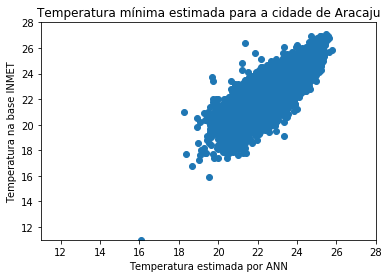

Coef. Corr. Pearson: 0.8288456343642892
MAE: 0.6068633139346412
MSE: 0.643417929120346


In [39]:
#Resultados Aracaju
PlotarGrafico(ModeloTempMin = ModeloTempMin_Aracaju, dataTempMin = dataTempMinAracaju, 
              tempMin = tempMinAracaju, cidade = "Aracaju")

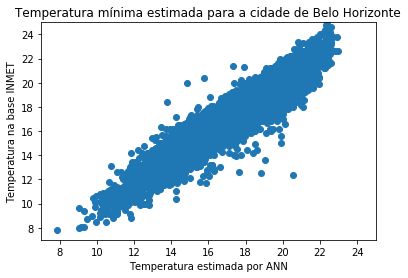

Coef. Corr. Pearson: 0.9489148429804026
MAE: 0.620208777482313
MSE: 0.6543529748158414


In [40]:
#Resultados Belo Horizonte
PlotarGrafico(ModeloTempMin = ModeloTempMin_BeloHorizonte, dataTempMin = dataTempMinBeloHorizonte, 
              tempMin = tempMinBeloHorizonte, cidade = "Belo Horizonte")

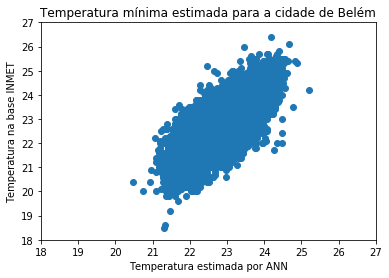

Coef. Corr. Pearson: 0.741641657372614
MAE: 0.47764901985816066
MSE: 0.3661690520537064


In [41]:
#Resultados Belém
PlotarGrafico(ModeloTempMin = ModeloTempMin_Belem, dataTempMin = dataTempMinBelem, 
              tempMin = tempMinBelem, cidade = "Belém")

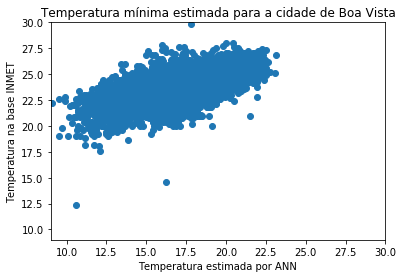

Coef. Corr. Pearson: 0.6582778323027885
MAE: 6.596327581305495
MSE: 45.93812628882611


In [42]:
#Resultados Boa Vista
PlotarGrafico(ModeloTempMin = ModeloTempMin_BoaVista, dataTempMin = dataTempMinBoaVista, 
              tempMin = tempMinBoaVista, cidade = "Boa Vista")

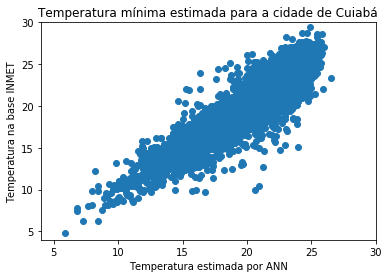

Coef. Corr. Pearson: 0.9191696518422852
MAE: 0.9453580109024302
MSE: 1.618333246427667


In [43]:
#Resultados Cuiabá
PlotarGrafico(ModeloTempMin = ModeloTempMin_Cuiaba, dataTempMin = dataTempMinCuiaba, 
              tempMin = tempMinCuiaba, cidade = "Cuiabá")

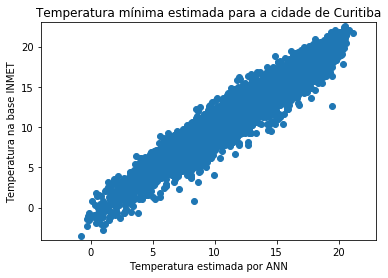

Coef. Corr. Pearson: 0.9677532319473365
MAE: 0.7866127515673846
MSE: 1.0470154997623315


In [44]:
#Resultados Curitiba
PlotarGrafico(ModeloTempMin = ModeloTempMin_Curitiba, dataTempMin = dataTempMinCuritiba, 
              tempMin = tempMinCuritiba, cidade = "Curitiba")

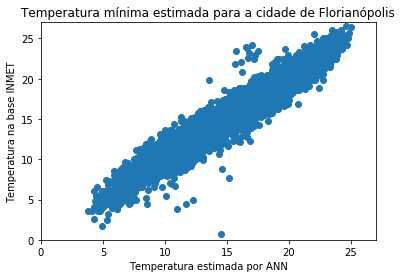

Coef. Corr. Pearson: 0.9691939535141877
MAE: 0.7773083289756771
MSE: 1.063138806027563


In [45]:
#Resultados Florianópolis
PlotarGrafico(ModeloTempMin = ModeloTempMin_Florianopolis, dataTempMin = dataTempMinFlorianopolis, 
              tempMin = tempMinFlorianopolis, cidade = "Florianópolis")

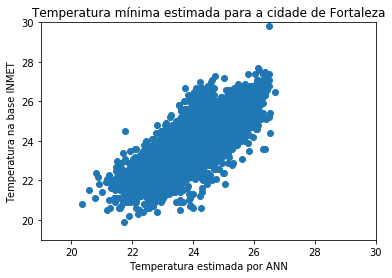

Coef. Corr. Pearson: 0.8252474123559682
MAE: 0.49110275521462793
MSE: 0.4142138908089648


In [46]:
#Resultados Fortaleza
PlotarGrafico(ModeloTempMin = ModeloTempMin_Fortaleza, dataTempMin = dataTempMinFortaleza, 
              tempMin = tempMinFortaleza, cidade = "Fortaleza")

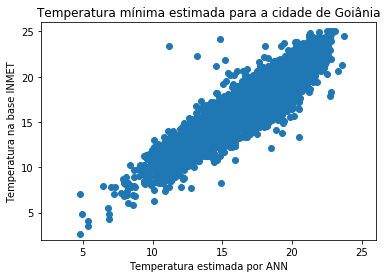

Coef. Corr. Pearson: 0.9282879487132203
MAE: 0.8160719995512242
MSE: 1.1312180568356052


In [47]:
#Resultados Goiânia
PlotarGrafico(ModeloTempMin = ModeloTempMin_Goiania, dataTempMin = dataTempMinGoiania, 
              tempMin = tempMinGoiania, cidade = "Goiânia")

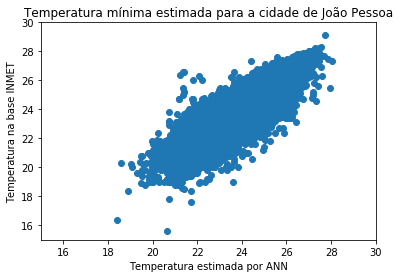

Coef. Corr. Pearson: 0.8671860482390803
MAE: 0.7131967973917741
MSE: 0.8107226504645394


In [48]:
#Resultados João Pessoa
PlotarGrafico(ModeloTempMin = ModeloTempMin_JoaoPessoa, dataTempMin = dataTempMinJoaoPessoa, 
              tempMin = tempMinJoaoPessoa, cidade = "João Pessoa")

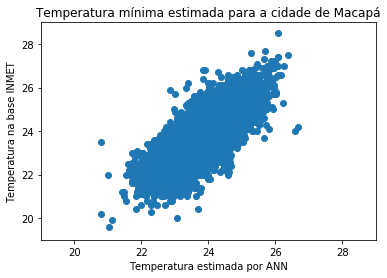

Coef. Corr. Pearson: 0.7519551578094924
MAE: 0.4643391607981738
MSE: 0.3573665261858791


In [49]:
#Resultados Macapá
PlotarGrafico(ModeloTempMin = ModeloTempMin_Macapa, dataTempMin = dataTempMinMacapa, 
              tempMin = tempMinMacapa, cidade = "Macapá")

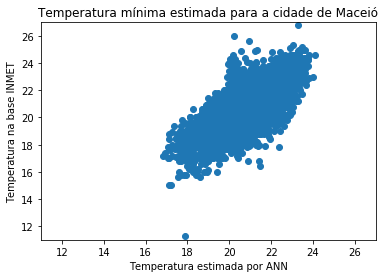

Coef. Corr. Pearson: 0.802845652062295
MAE: 0.7400624538262006
MSE: 0.927266774303812


In [50]:
#Resultados Maceió
PlotarGrafico(ModeloTempMin = ModeloTempMin_Maceio, dataTempMin = dataTempMinMaceio, 
              tempMin = tempMinMaceio, cidade = "Maceió")

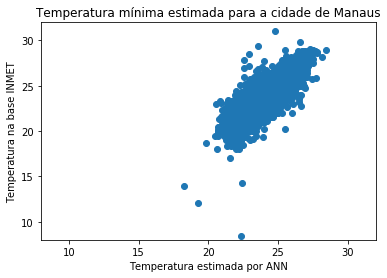

Coef. Corr. Pearson: 0.7909251780421194
MAE: 0.6766352432963556
MSE: 0.7934575560228868


In [51]:
#Resultados Manaus
PlotarGrafico(ModeloTempMin = ModeloTempMin_Manaus, dataTempMin = dataTempMinManaus, 
              tempMin = tempMinManaus, cidade = "Manaus")

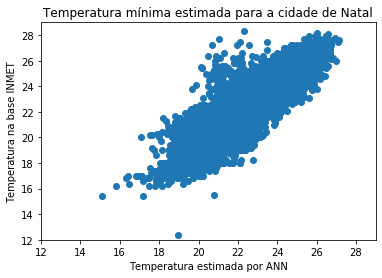

Coef. Corr. Pearson: 0.8597512213312565
MAE: 0.8491297267185569
MSE: 1.2107966730810376


In [52]:
#Resultados Natal
PlotarGrafico(ModeloTempMin = ModeloTempMin_Natal, dataTempMin = dataTempMinNatal, 
              tempMin = tempMinNatal, cidade = "Natal")

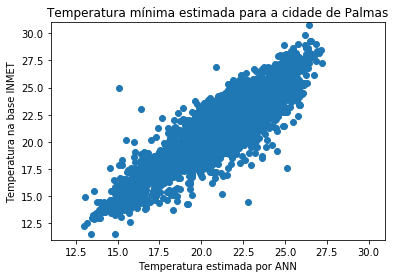

Coef. Corr. Pearson: 0.8813541274887664
MAE: 0.7902528245364243
MSE: 1.1320828989355483


In [53]:
#Resultados Palmas
PlotarGrafico(ModeloTempMin = ModeloTempMin_Palmas, dataTempMin = dataTempMinPalmas, 
              tempMin = tempMinPalmas, cidade = "Palmas")

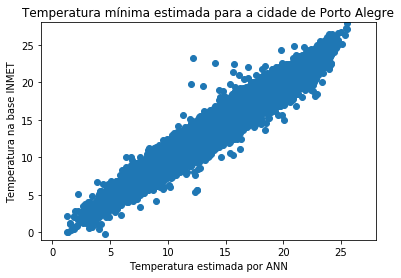

Coef. Corr. Pearson: 0.9773230113941205
MAE: 0.7858890459388141
MSE: 1.063189763588071


In [54]:
#Resultados Porto Alegre
PlotarGrafico(ModeloTempMin = ModeloTempMin_PortoAlegre, dataTempMin = dataTempMinPortoAlegre, 
              tempMin = tempMinPortoAlegre, cidade = "Porto Alegre")

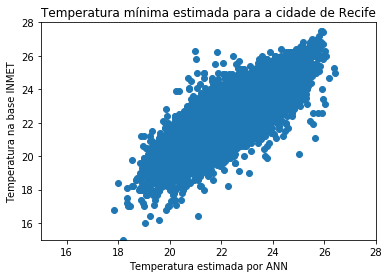

Coef. Corr. Pearson: 0.8207171545162196
MAE: 0.6812789581464385
MSE: 0.7557900171638957


In [55]:
#Resultados Recife
PlotarGrafico(ModeloTempMin = ModeloTempMin_Recife, dataTempMin = dataTempMinRecife, 
              tempMin = tempMinRecife, cidade = "Recife")

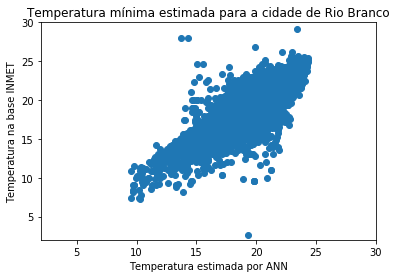

Coef. Corr. Pearson: 0.8642028569424318
MAE: 0.9218589646301854
MSE: 1.8131906234322344


In [56]:
#Resultados Rio Branco
PlotarGrafico(ModeloTempMin = ModeloTempMin_RioBranco, dataTempMin = dataTempMinRioBranco, 
              tempMin = tempMinRioBranco, cidade = "Rio Branco")

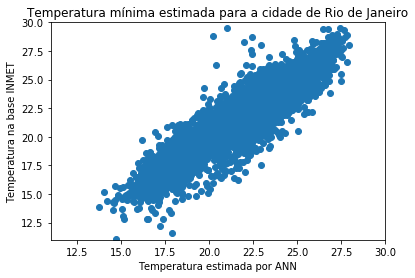

Coef. Corr. Pearson: 0.9318561390373417
MAE: 0.7297223546604799
MSE: 1.0383792305923476


In [57]:
#Resultados Rio de Janeiro
PlotarGrafico(ModeloTempMin = ModeloTempMin_RioDeJaneiro, dataTempMin = dataTempMinRioDeJaneiro, 
              tempMin = tempMinRioDeJaneiro, cidade = "Rio de Janeiro")

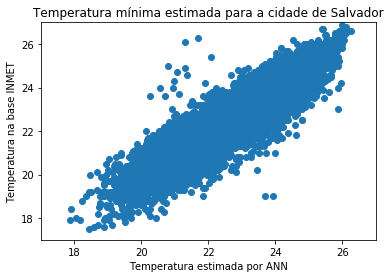

Coef. Corr. Pearson: 0.8954533242444824
MAE: 0.5521333489841772
MSE: 0.5011961270140768


In [58]:
#Resultados Salvador
PlotarGrafico(ModeloTempMin = ModeloTempMin_Salvador, dataTempMin = dataTempMinSalvador, 
              tempMin = tempMinSalvador, cidade = "Salvador")

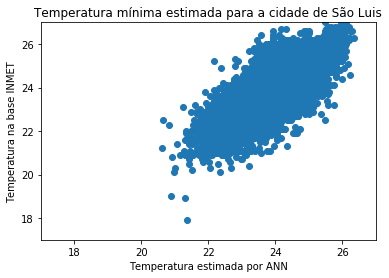

Coef. Corr. Pearson: 0.7938198374016908
MAE: 0.5203738758075543
MSE: 0.44989307442958704


In [59]:
#Resultados São Luis
PlotarGrafico(ModeloTempMin = ModeloTempMin_SaoLuis, dataTempMin = dataTempMinSaoLuis, 
              tempMin = tempMinSaoLuis, cidade = "São Luis")

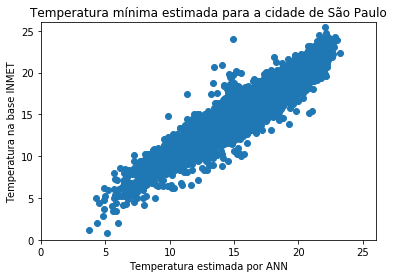

Coef. Corr. Pearson: 0.9617358981358128
MAE: 0.6778097025770498
MSE: 0.8342280672995132


In [60]:
#Resultados São Paulo
PlotarGrafico(ModeloTempMin = ModeloTempMin_SaoPaulo, dataTempMin = dataTempMinSaoPaulo, 
              tempMin = tempMinSaoPaulo, cidade = "São Paulo")

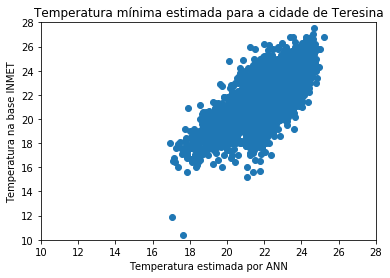

Coef. Corr. Pearson: 0.7612929859631181
MAE: 0.766673013307272
MSE: 1.0340803690595055


In [61]:
#Resultados Teresina
PlotarGrafico(ModeloTempMin = ModeloTempMin_Teresina, dataTempMin = dataTempMinTeresina, 
              tempMin = tempMinTeresina, cidade = "Teresina")

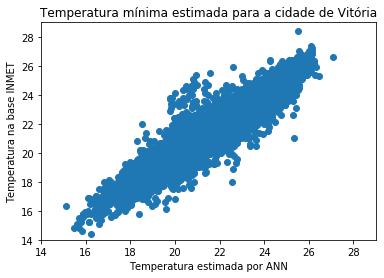

Coef. Corr. Pearson: 0.9507425053270114
MAE: 0.5093543147008834
MSE: 0.4769048958485876


In [62]:
#Resultados Vitória
PlotarGrafico(ModeloTempMin = ModeloTempMin_Vitoria, dataTempMin = dataTempMinVitoria, 
              tempMin = tempMinVitoria, cidade = "Vitória")